In [2]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement ML Algorithms
import sklearn
from xgboost import XGBRegressor # Random Forest

# Import MAPIE to calculate prediction intervals
from mapie.regression import MapieRegressor

# To calculate coverage score
from mapie.metrics import regression_coverage_score

# Package for data partitioning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# Package to record time
import time

# Module to save and load Python objects to and from files
import pickle 

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline

In [3]:
# Import Data
df = pd.read_csv('California_airbnb.csv')
df.head()

,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,accommodates,beds,minimum_nights,maximum_nights,number_of_reviews_ltm,review_scores_rating,instant_bookable,City,Region,bathrooms,price
0,0.0,18.0,1.0,Broadway-Manchester,33.94587,-118.27583,Private room in home,2.0,1.0,30.0,30.0,1.0,5.00,1.0,los-angeles,Arroyo Verdugo,2.0,10.0
1,0.0,2.0,1.0,Del Rey,33.98559,-118.42930,Private room in rental unit,2.0,1.0,30.0,60.0,0.0,5.00,0.0,los-angeles,Arroyo Verdugo,1.0,10.0
2,0.0,6.0,1.0,Pico-Union,34.04541,-118.27257,Private room in rental unit,1.0,1.0,30.0,150.0,2.0,4.67,0.0,los-angeles,Arroyo Verdugo,1.0,10.0
3,0.0,9.0,1.0,Monterey Park,34.05601,-118.14548,Private room in condo,1.0,2.0,180.0,720.0,0.0,4.33,1.0,los-angeles,Arroyo Verdugo,1.0,27.0
4,0.0,74.0,1.0,Westlake,34.07561,-118.28642,Private room in home,1.0,1.0,30.0,30.0,6.0,4.50,0.0,los-angeles,Arroyo Verdugo,3.0,27.0


In [4]:
df = df.dropna()

In [5]:
# Select input and output features
X = df.drop(columns = ['latitude','longitude','neighbourhood_cleansed','price'])
y = df['price']

In [6]:
# One hot encoding for categorical variables
X_encoded = pd.get_dummies(X)
X_encoded.head()

,host_is_superhost,host_total_listings_count,host_identity_verified,accommodates,beds,minimum_nights,maximum_nights,number_of_reviews_ltm,review_scores_rating,instant_bookable,...,City_los-angeles,Region_Arroyo Verdugo,Region_City of Los Angeles,Region_Gateway Cities COG,Region_Las Virgenes,Region_North Los Angeles County,Region_San Fernando Valley,Region_San Gabriel Valley Association of Cities,Region_South Bay Cities Association,Region_Westside Cities
0,0.0,18.0,1.0,2.0,1.0,30.0,30.0,1.0,5.00,1.0,...,True,True,False,False,False,False,False,False,False,False
1,0.0,2.0,1.0,2.0,1.0,30.0,60.0,0.0,5.00,0.0,...,True,True,False,False,False,False,False,False,False,False
2,0.0,6.0,1.0,1.0,1.0,30.0,150.0,2.0,4.67,0.0,...,True,True,False,False,False,False,False,False,False,False
3,0.0,9.0,1.0,1.0,2.0,180.0,720.0,0.0,4.33,1.0,...,True,True,False,False,False,False,False,False,False,False
4,0.0,74.0,1.0,1.0,1.0,30.0,30.0,6.0,4.50,0.0,...,True,True,False,False,False,False,False,False,False,False


In [7]:
# Data partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = .2, random_state = 0)

In [10]:
# Define model
reg = XGBRegressor(random_state = 0)

In [11]:
# Start with an initial guess for parameters
# Create the random grid
random_grid = {'max_depth': [3, 5, 7],
               'learning_rate': [0.1, 0.01, 0.001],
               'subsample': [0.5, 0.7, 1]}

In [12]:
# Creating folds
folds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 0)

In [10]:
# Call RandomizedSearchCV()
model_cv = RandomizedSearchCV(estimator = reg,
                              param_distributions = random_grid,
                              n_iter = 50,
                              scoring = 'r2',
                              cv = folds,
                              verbose = 2,
                              random_state = 42,
                              n_jobs = -1) # Will utilize all available CPUs

In [11]:
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 27 candidates, totalling 81 fits


KeyboardInterrupt: 

In [ ]:
print('Initial score: ', model_cv.best_score_)
print('Initial parameters: ', model_cv.best_params_)

Initial score:  0.5514852444100108
Initial parameters:  {'subsample': 0.7, 'max_depth': 7, 'learning_rate': 0.1}


In [ ]:
# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [11, 12, 13],
    'learning_rate': [0.1, .11, .12],
    'subsample': [.7, .8, .9]
}


In [ ]:
# Call GridSearchCV()
model_cv = GridSearchCV(estimator = reg,
                        param_grid = param_grid,
                        scoring= 'r2',
                        cv = folds,
                        verbose = 1,
                        n_jobs = -1) 

In [ ]:
# Fit the model
start = time.time()            # Start Time
model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Training time: 140.6133267879486s


In [ ]:
print('Improved score: ', model_cv.best_score_)
print('Improved parameters: ', model_cv.best_params_)

Improved score:  0.6078930176537383
Improved parameters:  {'learning_rate': 0.11, 'max_depth': 12, 'subsample': 0.8}


In [ ]:
# Predict Test Set
y_pred = model_cv.predict(test_X)

# Evaluate the model on test set
r2 = sklearn.metrics.r2_score(test_y, y_pred)
rmse = sklearn.metrics.root_mean_squared_error(test_y, y_pred)
print('R-squared on Test Set: %0.2f' %r2)
print('RMSE on Test Set: %0.2f' %rmse)

R-squared on Test Set: 0.71
RMSE on Test Set: 195.33


#### Histogram of Residuals/Errors 

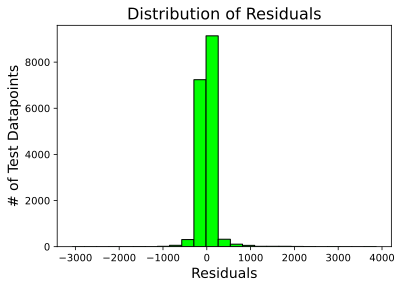

In [ ]:
# Calculate the residuals by subtracting the predicted values from the actual test values
all_residuals = test_y - y_pred

# Set up the figure with custom size and resolution (DPI)
plt.figure(figsize=(6, 4), dpi = 150)

# Plot the histogram of residuals
plt.hist(all_residuals, bins = 25, color = 'lime', edgecolor = 'black')

# Label X and Y axes
plt.xlabel('Residuals', fontsize = 14)
plt.ylabel('# of Test Datapoints', fontsize = 14)

# Set the title of the plot
plt.title('Distribution of Residuals', fontsize = 16)

# Adjust the font size of x and y ticks
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("xg_residuals.svg");

#### Scatter Plot of Predicted Vs. Actual Values

In [ ]:
# Setting the figure size and resolution
plt.figure(figsize = (6, 4), dpi = 150)

# Scatter plot of actual vs predicted values
plt.scatter(test_y, y_pred, color = 'blue', alpha = 0.6, edgecolor = 'black', s = 40)

# 45-degree reference line (perfect predictions)
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], color = 'red', linestyle = '--', lw = 2)

# Axis labels and title
plt.xlabel('Actual Values', fontsize = 10)
plt.ylabel('Predicted Values', fontsize = 10)
plt.title('Predicted vs Actual Values', fontsize = 12)

# Adjust ticks
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("xg_pred_actual.svg");

#### Feature Importance Plot

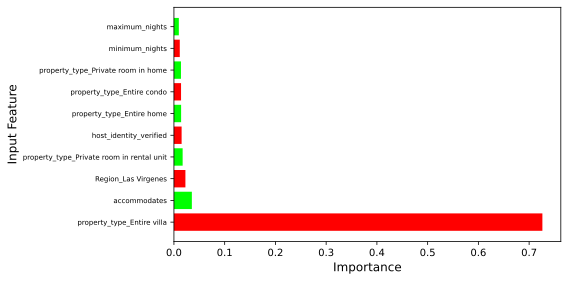

In [ ]:
# Storing importance values from the trained model
importance = model_cv.best_estimator_.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True).head(10)

# Bar plot
plt.figure(figsize=(8, 4))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['red', 'lime'])

plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Input Feature", fontsize = 12)
plt.yticks(fontsize = 7) # fontsize of yticks
plt.xticks(fontsize = 10) # fontsize of xticks

plt.tight_layout();
plt.savefig("xg_feat_imp.svg");

In [13]:
model_pickle = open('xg_ml.pickle', 'rb') 
model_cv = pickle.load(model_pickle) 
model_pickle.close()

In [ ]:
# Define MAPIE regressor
mapie = MapieRegressor(estimator = model_cv, # Prediction model to use
                       n_jobs = -1,
                       random_state = 0)

# Fit mapie regressor on training data
start = time.time()  
mapie.fit(train_X, train_y)
stop = time.time()             
print(f"Training time: {stop - start}s")

Training time: 14.068599700927734s


In [32]:
test_X_1 = test_X[:5000]

In [33]:
alpha = 0.1

# Use mapie.predict() to get predicted values and intervals
y_test_pred, y_test_pis = mapie.predict(test_X_1, alpha = alpha)

In [34]:
# Predicted values
y_test_pred

array([1057.5496 ,  175.84566,  232.70804, ...,  217.06293,  220.27725,
         78.41453], dtype=float32)

In [35]:
# Prediction Intervals
y_test_pis

array([[[ 763.75244141],
        [1207.25491333]],

       [[  -9.0869751 ],
        [ 391.76245117]],

       [[  43.18144226],
        [ 427.94519043]],

       ...,

       [[  22.71582794],
        [ 484.78710938]],

       [[  34.5688324 ],
        [ 431.65588379]],

       [[ -73.02589417],
        [ 317.06571198]]])

In [36]:
# Storing results in a dataframe
predictions = test_y[:5000].to_frame()
predictions.columns = ['Actual Value']
predictions["Predicted Value"] = y_test_pred.round(2)
predictions["Lower Value"] = y_test_pis[:, 0].round(2)
predictions["Upper Value"] = y_test_pis[:, 1].round(2)

# Take a quick look
predictions.tail(5)

,Actual Value,Predicted Value,Lower Value,Upper Value
61482,181.0,176.580002,-23.66,358.44
24773,90.0,113.750000,-71.88,310.09
71375,173.0,217.059998,22.72,484.79
67074,120.0,220.279999,34.57,431.66
41324,91.0,78.410004,-73.03,317.07


#### Coverage

In [37]:
coverage = regression_coverage_score(test_y[:5000],           # Actual values
                                     y_test_pis[:, 0], # Lower bound of prediction intervals
                                     y_test_pis[:, 1]) # Upper bound of prediction intervals

coverage_percentage = coverage * 100
print(f"Coverage: {coverage_percentage:.2f}%")

Coverage: 92.58%


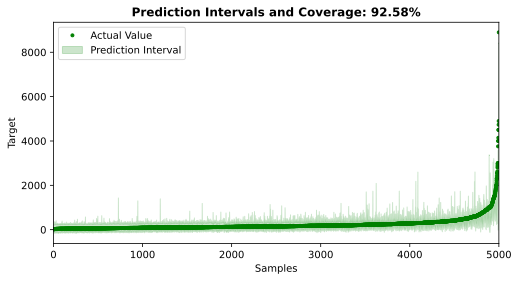

In [38]:
# Sort the predictions by 'Actual Value' for better visualization and reset the index
sorted_predictions = predictions.sort_values(by=['Actual Value']).reset_index(drop=True)

# Create a figure and axis object with specified size and resolution
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the actual values with green dots
plt.plot(sorted_predictions["Actual Value"], 'go', markersize=3, label="Actual Value")

# Fill the area between the lower and upper bounds of the prediction intervals with semi-transparent green color
plt.fill_between(np.arange(len(sorted_predictions)),
                 sorted_predictions["Lower Value"],
                 sorted_predictions["Upper Value"],
                 alpha=0.2, color="green", label="Prediction Interval")

# Set font size for x and y ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set the limit for the x-axis to cover the range of samples
plt.xlim([0, len(sorted_predictions)])

# Label the x-axis and y-axis with appropriate font size
plt.xlabel("Samples", fontsize=10)
plt.ylabel("Target", fontsize=10)

# Add a title to the plot, including the coverage percentage, with bold formatting
plt.title(f"Prediction Intervals and Coverage: {coverage_percentage:.2f}%", fontsize=12, fontweight="bold")

# Add a legend to the plot, placed in the upper left, with specified font size
plt.legend(loc="upper left", fontsize=10);
plt.savefig("coverage.svg");

### Save Model

In [ ]:
## This is the original non-MAPIE model!!
# Creating the file where we want to write the model
reg_pickle = open('xg_ml.pickle', 'wb') 

# Write RF model to the file
pickle.dump(model_cv.best_estimator_, reg_pickle) 

# Close the file
reg_pickle.close()

In [39]:
## This is the MAPIE model!!
# Creating the file where we want to write the model
reg_pickle = open('xg_ml1.pickle', 'wb') 

# Write RF model to the file
pickle.dump(mapie, reg_pickle) 

# Close the file
reg_pickle.close()